# Consolidation exercise - robot driving

<img style="float: right;" width="30%" src="https://a.pololu-files.com/picture/0J12003.600x480.jpg"/>

This week, you're going to put together all the elements you have learnt so far:

- Calculating quantities with _expressions_ and storing them in _variables_
- Making decisions based on _comparison operators_ using `if`, `elif` and `else` _statements_
- Repeating statements using _loops_ with either `for` or `while` statements

Your task is to drive a simulation of a robot like the one on the right.  You can navigate based on position and heading, or follow a line, and tackle some challenges - getting to some places, avoiding others.

(There's a lot to simulation and I have skipped much of it in this exercise.  Your robot will move exactly when you ask it to move, go _almost_ where you tell it to go, and tell you exactly where it is.  No real robot does any of those things!)


## Getting started

Either:

- Click [this link](https://colab.research.google.com/github/engmaths/SEMT10002_2024/blob/main/weekly_labs/Week_02_Operators/week_02_operators.ipynb) to open this notebook in Google colab.
- You will need to download the simulator library using the cell below.

or

- Download it to your local computer using `git clone https://github.com/engmaths/SEMT10002_2024` or just use `git pull` to refresh if you've done this already.
- Navigate to the subfolder `consolidation_exercises/Week_05_robot` and open the notebook `week_05_consolidation_robots.ipynb`.

In [46]:
import sys
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/engmaths/SEMT10002_2024/refs/heads/main/consolidation_exercises/Week_05_robot/cpa_robot.py

## Launching the simulator

The following line loads the simulator.  If it fails, make sure you did all the download activities described above.  You should have a file `cpa_robot.py` in the folder with this notebook.

In [47]:
from cpa_robot import position_x, position_y, orientation, drive, plot_path, reset_robot, plot_robot, sensor_left, sensor_middle, sensor_right
reset_robot()

## Meet the robot

The plot below shows the geometry of the robot, shown pointing upwards in this starting pose.  It has two wheels (the black lines) 5cm apart, each with its own motor.  Three light sensors (the red dots) are 3.5cm in front of the wheels, one positioned on the robot centre line and the other two 0.75cm either side.

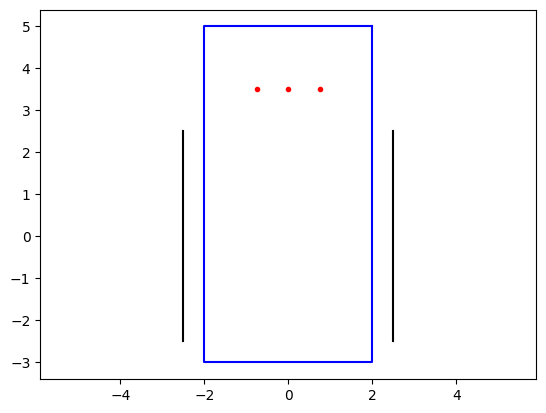

In [48]:
plot_robot()

### Where am I?

You can read the position and orientation:

- `position_x()` returns the position along the x axis in cm
- `position_y()` returns the position along the y axis in cm
- `orientation()` returns the angle in radians of the pointing (wheel) direction, clockwise from the y axis

They all start from 0 on start-up, i.e. robot pointing along y axis.

In [49]:
print('X',position_x())
print('Y',position_y())
print('orientation',orientation())

X 0.0
Y 0.0
orientation 0.0


### Moving the robot

The `drive` statement moves the robot by commanding each wheel to turn a certain amount, in this case calibrated such that 1 unit of drive moves the tread of the wheel by 1cm.  Hence `drive(20.0,20.0)` should move use 20cm forwards, which means along the y axis from the starting point.

In [50]:
drive(20.0,20.0)
print('X',position_x())
print('Y',position_y())
print('orientation',orientation())

X 0.0
Y 19.999999999999993
orientation 0.0


(I did warn you it won't go exactly where you ask.)

You can turn the robot on the spot by giving equal but opposite commands to each wheel.  Remembering $\ell - R\theta$ relates arc length $\ell$ to angle $\theta$, then each wheel must turn by $2.5\theta$ cm to rotate by angle theta.  Let's try $45^o = \frac{\pi}{4}$ rad.

In [51]:
from math import pi
dist = 2.5*pi/4.0
drive(dist,-dist)
print('X',position_x())
print('Y',position_y())
print('orientation',orientation())

X 0.0
Y 19.999999999999993
orientation 0.785398163397449


Now let's drive in a big arc, moving both wheels forward but left fast than right, and finally use the `plot_path()` statement to see where we have been altogether.

X 16.053362193301574
Y 24.88505738233867
orientation 1.7853981633974498


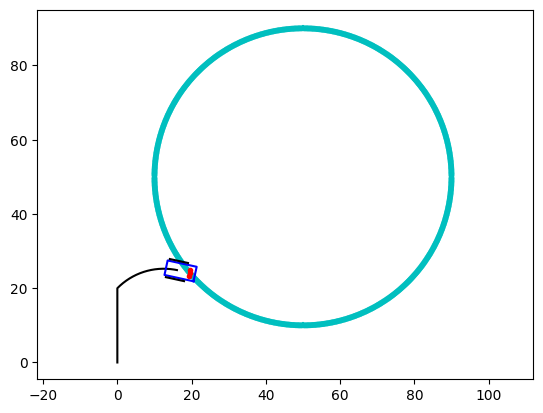

In [52]:
drive(20.0,15.0)
print('X',position_x())
print('Y',position_y())
print('orientation',orientation())
plot_path()

The path (black line) shows what we expected - straight up the y-axis for 20cm, then turn on the spot $45^o$, then finally an arc curving to the right, as the left wheel was turning faster. 

### Line sensors

As you can see in the plot above, there is a circular line marked out in the robot's world (the green/blue circle).  It is centred at point (50,50) with radius 40cm and thickness 1cm.   Functions `sensor_left()`, `sensor_middle()` and `sensor_right()` will return `True` if they are on the line or `False` otherwise.

In [53]:
print('Left',sensor_left())
print('Middle',sensor_middle())
print('Right',sensor_right())

Left False
Middle True
Right False


In [54]:
reset_robot()

In [55]:
drive(0.0,2.5)

In [56]:
print(position_x(),position_y())

-0.3000482256739712 1.2000840764381773


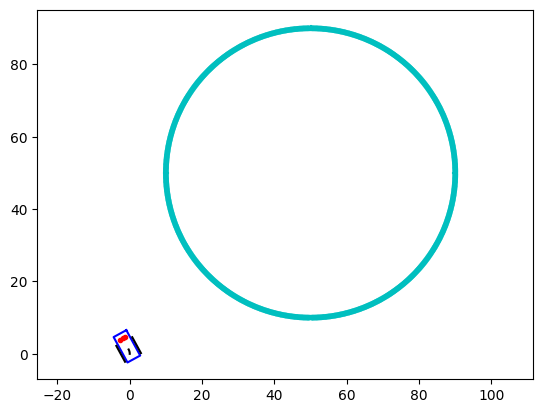

In [57]:
plot_path()

-1.019186533580275 2.516457919273738


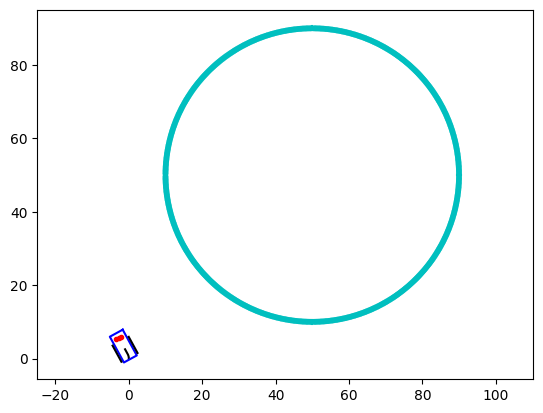

In [58]:
drive(1.5,1.5)
print(position_x(),position_y())
plot_path()

0.4190900822323348 5.14920560494486


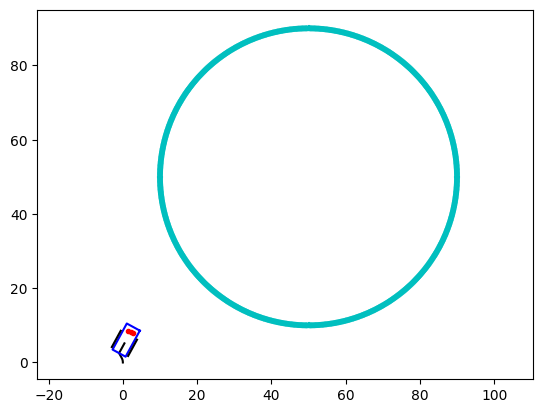

In [59]:
drive(2.5,-2.5)
drive(3,3)
print(position_x(),position_y())
plot_path()

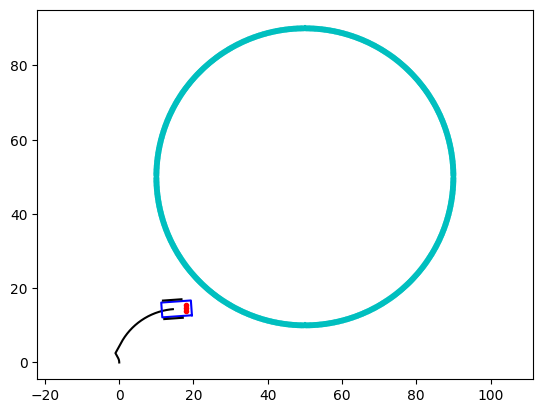

In [60]:
drive(20.0,15.0)
plot_path()